In [5]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import seaborn as sns


In [ ]:
accuracy_score(y_test, y_pred)

0.9726603575184016

In [2]:
data = pd.read_csv("./train.csv", encoding = 'ISO-8859-1', low_memory = False)
clmns = ['fine_amount', 'state_fee', 'late_fee', 'discount_amount', 'balance_due', 'compliance']
to_drop = list(set(data.columns)-set(clmns))
data.drop(to_drop, axis=1, inplace=True)
data.dropna(inplace=True)

In [3]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

<AxesSubplot:xlabel='compliance', ylabel='count'>

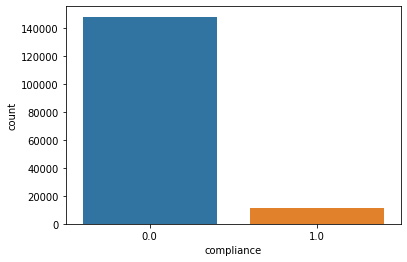

In [6]:
sns.countplot(x='compliance', data=data)

In [7]:
model = DecisionTreeClassifier(random_state=23)
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)
print('[train] F1-score = {:.2f}'.format(f1_train))
print('[test] F1-score = {:.2f}'.format(f1_test))

[train] F1-score = 0.66
[test] F1-score = 0.58


In [11]:
add = data[data.compliance==0][:data['compliance'].value_counts().min()]

In [14]:
data_new = pd.concat(([add, data[data.compliance==1]]))

In [16]:
X = data_new.iloc[:,:-1]
y = data_new.iloc[:,-1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

model_1 = DecisionTreeClassifier(random_state=23)
model_1.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)
print('[train] F1-score = {:.2f}'.format(f1_train))
print('[test] F1-score = {:.2f}'.format(f1_test))

[train] F1-score = 0.68
[test] F1-score = 0.65
